In [2]:
import seaborn as sns

In [3]:
# Support Vector Machines
iris = sns.load_dataset('iris')

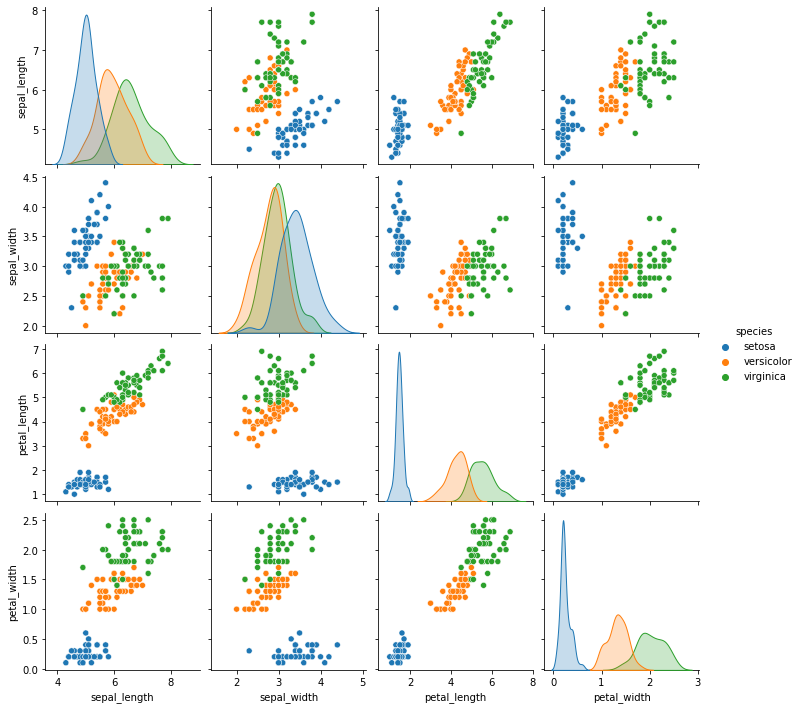

In [4]:
sns.pairplot(iris, hue='species')

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

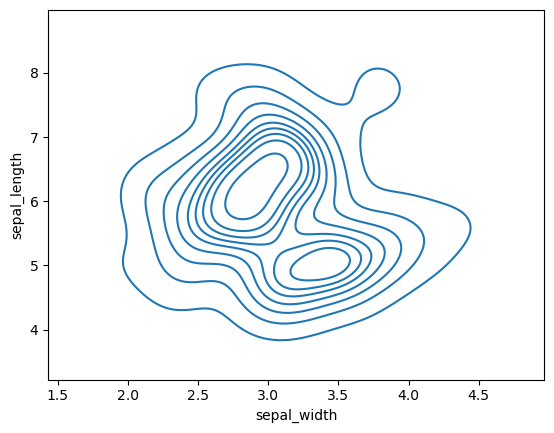

In [5]:
sns.kdeplot(data=iris, x='sepal_width', y='sepal_length')

In [6]:
setosa = iris[iris['species']=='setosa']

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

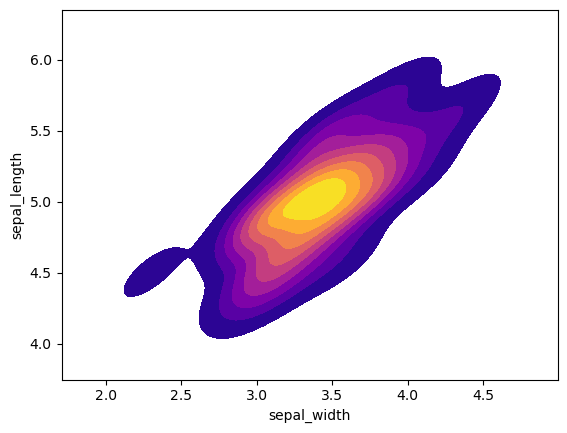

In [7]:
sns.kdeplot(data=setosa, x='sepal_width', y='sepal_length', cmap='plasma', shade=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.svm import SVC

In [11]:
svc = SVC()

In [12]:
svc.fit(X_train, y_train)

SVC()

In [13]:
pred = svc.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}

In [18]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [21]:
prediction = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test, prediction))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [23]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

